In [61]:
 !pip install emlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for emlearn: filename=emlearn-0.20.4-cp310-cp310-linux_x86_64.whl size=1729459 sha256=c9d91955eed0b2bb64e33fb86232d2909e2929c54f199784af54dbcdbb2fe99b
  Stored in directory: /root/.cache/pip/wheels/47/78/32/2420388ad442738f2565baf249c58afc180aece57b962a04fc
Successfully built emlearn


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/ML_IOT/dataset.csv', index_col=0, low_memory=False)
#data = pd.read_csv('dataset.csv', index_col=0, low_memory=False)
data


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,none
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291336,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,...,0.0,0.0,0.0,82.500,7.500,82.500,52.500,model4,5,none
291337,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,...,0.0,0.0,0.0,82.625,7.625,82.625,52.625,model4,5,none
291338,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,...,0.0,0.0,0.0,82.750,7.750,82.750,52.750,model4,5,none
291339,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,...,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5,none


In [6]:
data[data.model == 'model1'].failure.value_counts()

failure
none     45264
comp3      478
comp2      346
comp4      293
comp1      240
Name: count, dtype: int64

In [7]:
data[data.model == 'model1'].age.value_counts()

age
14    8743
15    5830
17    5827
16    5826
3     2914
11    2914
10    2914
2     2914
20    2913
7     2913
5     2913
Name: count, dtype: int64

In [8]:
# fit just on model1
data = data.loc[data.model == 'model1']

In [13]:
data.drop(columns=['model', 'machineID'], inplace=True)

<ipython-input-13-20af65a5ff18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['model', 'machineID'], inplace=True)


In [14]:
data.datetime = pd.to_datetime(data.datetime)

<ipython-input-14-4de781fa430a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.datetime = pd.to_datetime(data.datetime)


In [17]:
data

,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age,failure
34960,2015-01-02 06:00:00,179.178056,492.030275,91.155905,38.162571,27.497743,11.183028,17.366019,3.862876,169.970005,...,0.0,0.0,0.0,0.0,200.000,5.000,35.000,125.000,15,none
34961,2015-01-02 09:00:00,169.073051,451.528135,95.460869,42.752140,19.283389,75.098589,4.837571,3.597729,171.469953,...,0.0,0.0,0.0,0.0,200.125,5.125,35.125,125.125,15,none
34962,2015-01-02 12:00:00,170.608473,476.470942,100.674812,36.086376,21.764942,60.931854,12.521208,4.204943,169.557287,...,0.0,0.0,0.0,0.0,200.250,5.250,35.250,125.250,15,none
34963,2015-01-02 15:00:00,174.670838,475.862555,97.439909,36.744674,23.224006,23.873635,13.829958,1.797458,169.630876,...,0.0,0.0,0.0,0.0,200.375,5.375,35.375,125.375,15,none
34964,2015-01-02 18:00:00,182.207294,454.472370,95.440034,41.682170,14.765826,42.989149,15.565441,3.872835,172.561341,...,0.0,0.0,0.0,0.0,200.500,5.500,35.500,125.500,15,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288423,2015-12-31 18:00:00,167.504059,453.015950,104.544704,40.666044,2.061104,34.348828,5.303050,1.242490,173.617686,...,0.0,0.0,0.0,0.0,107.500,2.500,32.500,17.500,14,none
288424,2015-12-31 21:00:00,169.364259,463.604006,107.419930,38.860420,16.605405,43.046122,14.556214,4.469230,173.471459,...,0.0,0.0,0.0,0.0,107.625,2.625,32.625,17.625,14,none
288425,2016-01-01 00:00:00,163.702815,456.186040,102.591205,46.892970,25.244118,50.005081,3.716025,4.936283,173.590189,...,0.0,0.0,0.0,0.0,107.750,2.750,32.750,17.750,14,none
288426,2016-01-01 03:00:00,156.866569,476.014458,96.735850,44.913658,8.614150,14.358157,4.232915,6.509766,170.762651,...,0.0,0.0,0.0,0.0,107.875,2.875,32.875,17.875,14,none


In [43]:
data.columns

Index(['datetime', 'voltmean_3h', 'rotatemean_3h', 'pressuremean_3h',
       'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h', 'pressuresd_3h',
       'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h', 'pressuremean_24h',
       'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h', 'pressuresd_24h',
       'vibrationsd_24h', 'error1count', 'error2count', 'error3count',
       'error4count', 'error5count', 'comp1', 'comp2', 'comp3', 'comp4', 'age',
       'failure'],
      dtype='object')

In [45]:
data.loc[:,['voltmean_24h', 'rotatemean_24h', 'pressuremean_24h',
       'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h', 'pressuresd_24h',
       'vibrationsd_24h', 'error1count', 'error2count', 'error3count',
       'error4count', 'error5count',]]

,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count
34960,169.970005,458.528826,100.327230,38.467292,14.283898,38.801713,10.330774,3.695511,0.0,0.0,0.0,0.0,0.0
34961,171.469953,456.351216,100.384270,38.733247,14.550127,40.366035,10.310125,3.472008,0.0,0.0,0.0,0.0,0.0
34962,169.557287,459.651672,99.060345,39.096028,14.869138,43.235588,10.149621,3.719294,0.0,0.0,0.0,0.0,0.0
34963,169.630876,465.944050,99.553253,38.449500,16.008500,42.151899,10.514077,3.542385,0.0,0.0,0.0,0.0,0.0
34964,172.561341,463.392070,98.587482,38.622570,17.258378,44.048336,11.159634,3.495887,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288423,173.617686,446.186826,100.076926,40.170123,16.411636,60.098604,9.645883,4.149842,0.0,0.0,0.0,0.0,0.0
288424,173.471459,444.899802,100.133863,39.503385,16.492184,56.893004,10.289439,4.058120,0.0,0.0,0.0,0.0,0.0
288425,173.590189,453.911077,101.602554,39.843161,15.163669,48.824588,9.466908,3.927727,0.0,0.0,0.0,0.0,0.0
288426,170.762651,457.539376,102.066995,40.295424,16.986287,48.722897,8.796796,4.361896,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

In [16]:
from sklearn.metrics import f1_score

In [19]:
# Perform a cross-validation on time series data with TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)

scores = []

# Get the target column
target = data.failure


df = data.drop(columns='failure')

for train_index, test_index in tscv.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)

    X_train, X_test = df.drop(columns='datetime').iloc[train_index], df.drop(columns='datetime').iloc[test_index]

    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    # Train a model on the training data and evaluate it on the test data
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # use the f-measure as a metric
    scores.append(f1_score(y_test, y_pred, average='macro'))


print(scores)



TRAIN: [   0    1    2 ... 4238 4239 4240] TEST: [4241 4242 4243 ... 8476 8477 8478]
TRAIN: [   0    1    2 ... 8476 8477 8478] TEST: [ 8479  8480  8481 ... 12714 12715 12716]
TRAIN: [    0     1     2 ... 12714 12715 12716] TEST: [12717 12718 12719 ... 16952 16953 16954]
TRAIN: [    0     1     2 ... 16952 16953 16954] TEST: [16955 16956 16957 ... 21190 21191 21192]
TRAIN: [    0     1     2 ... 21190 21191 21192] TEST: [21193 21194 21195 ... 25428 25429 25430]
TRAIN: [    0     1     2 ... 25428 25429 25430] TEST: [25431 25432 25433 ... 29666 29667 29668]
TRAIN: [    0     1     2 ... 29666 29667 29668] TEST: [29669 29670 29671 ... 33904 33905 33906]
TRAIN: [    0     1     2 ... 33904 33905 33906] TEST: [33907 33908 33909 ... 38142 38143 38144]
TRAIN: [    0     1     2 ... 38142 38143 38144] TEST: [38145 38146 38147 ... 42380 42381 42382]
TRAIN: [    0     1     2 ... 42380 42381 42382] TEST: [42383 42384 42385 ... 46618 46619 46620]
[0.7118125993785409, 0.9487067841079059, 0.87371

In [20]:
# Create a data frame with the scores
scores_df = pd.DataFrame(scores, columns=['f1_score_with_age'])
scores_df

,f1_score_with_age
0,0.711813
1,0.948707
2,0.873713
3,0.907102
4,0.889729
5,0.851308
6,0.835698
7,0.927070
8,0.964729
9,0.955033


In [21]:
# Remove the age column and repeat the cross-validation
df_noAge = data.drop(columns=['age'])

scores = []

# Get the target column
target = df_noAge.failure

df = df_noAge.drop(columns='failure')

for train_index, test_index in tscv.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)

    X_train, X_test = df.drop(columns='datetime').iloc[train_index], df.drop(columns='datetime').iloc[test_index]

    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    # Train a model on the training data and evaluate it on the test data
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # use the f-measure as a metric
    scores.append(f1_score(y_test, y_pred, average='macro'))

print(scores)

TRAIN: [   0    1    2 ... 4238 4239 4240] TEST: [4241 4242 4243 ... 8476 8477 8478]
TRAIN: [   0    1    2 ... 8476 8477 8478] TEST: [ 8479  8480  8481 ... 12714 12715 12716]
TRAIN: [    0     1     2 ... 12714 12715 12716] TEST: [12717 12718 12719 ... 16952 16953 16954]
TRAIN: [    0     1     2 ... 16952 16953 16954] TEST: [16955 16956 16957 ... 21190 21191 21192]
TRAIN: [    0     1     2 ... 21190 21191 21192] TEST: [21193 21194 21195 ... 25428 25429 25430]
TRAIN: [    0     1     2 ... 25428 25429 25430] TEST: [25431 25432 25433 ... 29666 29667 29668]
TRAIN: [    0     1     2 ... 29666 29667 29668] TEST: [29669 29670 29671 ... 33904 33905 33906]
TRAIN: [    0     1     2 ... 33904 33905 33906] TEST: [33907 33908 33909 ... 38142 38143 38144]
TRAIN: [    0     1     2 ... 38142 38143 38144] TEST: [38145 38146 38147 ... 42380 42381 42382]
TRAIN: [    0     1     2 ... 42380 42381 42382] TEST: [42383 42384 42385 ... 46618 46619 46620]
[0.7741045951220948, 0.9070340796319124, 0.92274

In [22]:
# Add the scores to the data frame
scores_df['f1_score_without_age'] = scores
scores_df

,f1_score_with_age,f1_score_without_age
0,0.711813,0.774105
1,0.948707,0.907034
2,0.873713,0.922743
3,0.907102,0.887904
4,0.889729,0.889729
5,0.851308,0.854227
6,0.835698,0.839163
7,0.927070,0.938160
8,0.964729,0.960450
9,0.955033,0.900986


<Axes: >

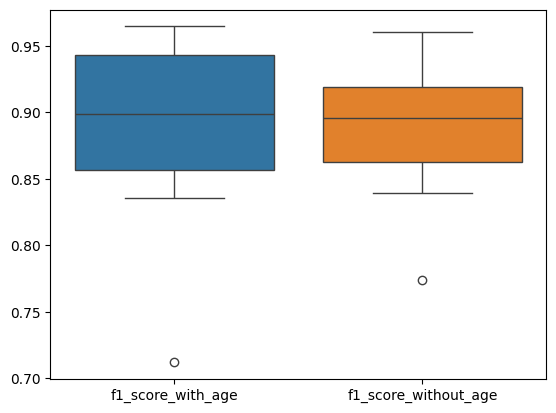

In [23]:
# Import matplotlib
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# Create a boxplot
sns.boxplot(data=scores_df)



In [24]:
# Print the mean of the f1 scores for each feature set
print(scores_df.mean())

f1_score_with_age       0.88649
f1_score_without_age    0.88745
dtype: float64


In [25]:
# Perform Wilcoxon signed-rank test
from scipy.stats import wilcoxon

# Perform the test
stat, p = wilcoxon(scores_df['f1_score_with_age'], scores_df['f1_score_without_age'])

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret the results
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')



Statistics=22.000, p=0.953
Same distribution (fail to reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [29]:
last_train_date, first_test_date = (pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00'))

train_y = df_noAge.loc[df_noAge['datetime'] < last_train_date, 'failure']

train_X = df_noAge.loc[df_noAge['datetime'] < last_train_date].drop(columns=['datetime','failure'])

test_X = df_noAge.loc[df_noAge['datetime'] > first_test_date].drop(columns=['datetime', 'failure'])

In [30]:
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

In [31]:
from sklearn.metrics import classification_report

In [32]:
test_y = df_noAge.loc[df_noAge['datetime'] > first_test_date, 'failure']

In [33]:
y_predicted = clf.predict(test_X)

In [34]:
y_predicted

array(['none', 'none', 'none', ..., 'none', 'none', 'none'], dtype=object)

In [35]:
print(classification_report(test_y, y_predicted))

              precision    recall  f1-score   support

       comp1       0.44      0.67      0.53        55
       comp2       0.89      0.99      0.94        97
       comp3       0.99      0.95      0.97       105
       comp4       0.93      0.88      0.90        91
        none       1.00      1.00      1.00     11463

    accuracy                           0.99     11811
   macro avg       0.85      0.90      0.87     11811
weighted avg       0.99      0.99      0.99     11811



In [38]:
# Estrai l'importanza delle caratteristiche
feature_importances = clf.feature_importances_

# Stampa l'importanza delle caratteristiche

for feature, importance in zip(train_X.columns, feature_importances):
    print(f'{feature}: {importance}')


voltmean_3h: 0.004235093374999817
rotatemean_3h: 0.004584415071453642
pressuremean_3h: 0.003013034808824561
vibrationmean_3h: 0.00017014619110663993
voltsd_3h: 0.00044238009687726416
rotatesd_3h: 0.0007656578599798799
pressuresd_3h: 0.0
vibrationsd_3h: 0.0
voltmean_24h: 0.12003581851613165
rotatemean_24h: 0.1411899467585135
pressuremean_24h: 0.18709124408529737
vibrationmean_24h: 0.09783550512380669
voltsd_24h: 0.0
rotatesd_24h: 0.0
pressuresd_24h: 0.00025521928665996
vibrationsd_24h: 0.0009667315726522647
error1count: 0.03771836054492116
error2count: 0.037179966306355075
error3count: 0.059741106769136
error4count: 0.1812688394420727
error5count: 0.10023858500062144
comp1: 0.0072603267054891455
comp2: 0.0035953836211102866
comp3: 0.011981209745601094
comp4: 0.00043102911838977746


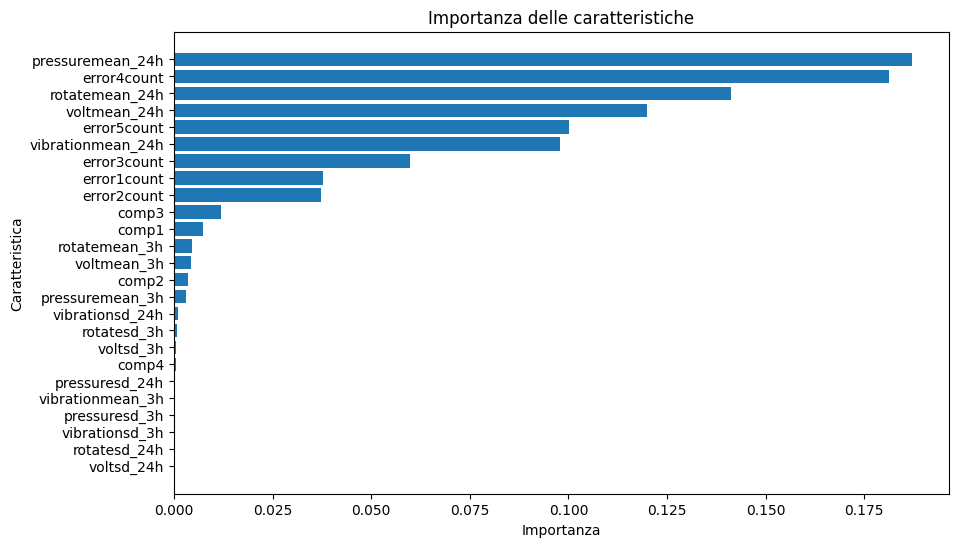

In [40]:
import numpy as np

# Crea un array di indici ordinati in base all'importanza
indices = np.argsort(feature_importances)

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.title('Importanza delle caratteristiche')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [train_X.columns[i] for i in indices])
plt.xlabel('Importanza')
plt.ylabel('Caratteristica')
plt.show()


In [42]:
key_features = []

for feature, importance in zip(train_X.columns, feature_importances):
  if importance > 0.025:
    print(f'{feature}: {importance}')
    key_features.append(feature)





voltmean_24h: 0.12003581851613165
rotatemean_24h: 0.1411899467585135
pressuremean_24h: 0.18709124408529737
vibrationmean_24h: 0.09783550512380669
error1count: 0.03771836054492116
error2count: 0.037179966306355075
error3count: 0.059741106769136
error4count: 0.1812688394420727
error5count: 0.10023858500062144


In [46]:
# Try to fit a model with these features
df_fsel = df_noAge.loc[:,['datetime','failure','voltmean_24h','rotatemean_24h','vibrationmean_24h','error1count','error2count','error3count','error4count','error5count']]

In [47]:
df_fsel

,datetime,failure,voltmean_24h,rotatemean_24h,vibrationmean_24h,error1count,error2count,error3count,error4count,error5count
34960,2015-01-02 06:00:00,none,169.970005,458.528826,38.467292,0.0,0.0,0.0,0.0,0.0
34961,2015-01-02 09:00:00,none,171.469953,456.351216,38.733247,0.0,0.0,0.0,0.0,0.0
34962,2015-01-02 12:00:00,none,169.557287,459.651672,39.096028,0.0,0.0,0.0,0.0,0.0
34963,2015-01-02 15:00:00,none,169.630876,465.944050,38.449500,0.0,0.0,0.0,0.0,0.0
34964,2015-01-02 18:00:00,none,172.561341,463.392070,38.622570,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
288423,2015-12-31 18:00:00,none,173.617686,446.186826,40.170123,0.0,0.0,0.0,0.0,0.0
288424,2015-12-31 21:00:00,none,173.471459,444.899802,39.503385,0.0,0.0,0.0,0.0,0.0
288425,2016-01-01 00:00:00,none,173.590189,453.911077,39.843161,0.0,0.0,0.0,0.0,0.0
288426,2016-01-01 03:00:00,none,170.762651,457.539376,40.295424,0.0,0.0,0.0,0.0,0.0


In [48]:

scores = []

# Get the target column
target = df_fsel.failure

df = df_fsel.drop(columns='failure')

for train_index, test_index in tscv.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)

    X_train, X_test = df.drop(columns='datetime').iloc[train_index], df.drop(columns='datetime').iloc[test_index]

    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    # Train a model on the training data and evaluate it on the test data
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # use the f-measure as a metric
    scores.append(f1_score(y_test, y_pred, average='macro'))

print(scores)

TRAIN: [   0    1    2 ... 4238 4239 4240] TEST: [4241 4242 4243 ... 8476 8477 8478]
TRAIN: [   0    1    2 ... 8476 8477 8478] TEST: [ 8479  8480  8481 ... 12714 12715 12716]
TRAIN: [    0     1     2 ... 12714 12715 12716] TEST: [12717 12718 12719 ... 16952 16953 16954]
TRAIN: [    0     1     2 ... 16952 16953 16954] TEST: [16955 16956 16957 ... 21190 21191 21192]
TRAIN: [    0     1     2 ... 21190 21191 21192] TEST: [21193 21194 21195 ... 25428 25429 25430]
TRAIN: [    0     1     2 ... 25428 25429 25430] TEST: [25431 25432 25433 ... 29666 29667 29668]
TRAIN: [    0     1     2 ... 29666 29667 29668] TEST: [29669 29670 29671 ... 33904 33905 33906]
TRAIN: [    0     1     2 ... 33904 33905 33906] TEST: [33907 33908 33909 ... 38142 38143 38144]
TRAIN: [    0     1     2 ... 38142 38143 38144] TEST: [38145 38146 38147 ... 42380 42381 42382]
TRAIN: [    0     1     2 ... 42380 42381 42382] TEST: [42383 42384 42385 ... 46618 46619 46620]
[0.6801722047057209, 0.8128323621364263, 0.72032

In [49]:
# Add the scores to the data frame
scores_df['f1_score_fsel'] = scores
scores_df

,f1_score_with_age,f1_score_without_age,f1_score_fsel
0,0.711813,0.774105,0.680172
1,0.948707,0.907034,0.812832
2,0.873713,0.922743,0.720324
3,0.907102,0.887904,0.798762
4,0.889729,0.889729,0.744276
5,0.851308,0.854227,0.855624
6,0.835698,0.839163,0.720773
7,0.927070,0.938160,0.833707
8,0.964729,0.960450,0.843095
9,0.955033,0.900986,0.824572


<Axes: >

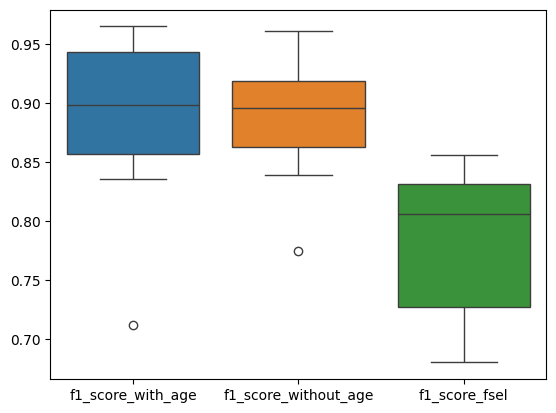

In [50]:
# Import matplotlib
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# Create a boxplot
sns.boxplot(data=scores_df)



In [51]:
last_train_date, first_test_date = (pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00'))

train_y = df_fsel.loc[df_fsel['datetime'] < last_train_date, 'failure']

train_X = df_fsel.loc[df_fsel['datetime'] < last_train_date].drop(columns=['datetime','failure'])

test_X = df_fsel.loc[df_fsel['datetime'] > first_test_date].drop(columns=['datetime', 'failure'])

In [52]:
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

In [54]:
test_y = df_fsel.loc[df_fsel['datetime'] > first_test_date, 'failure']

In [55]:
y_predicted = clf.predict(test_X)

In [56]:
y_predicted

array(['none', 'none', 'none', ..., 'none', 'none', 'none'], dtype=object)

In [57]:
print(classification_report(test_y, y_predicted))

              precision    recall  f1-score   support

       comp1       0.95      0.67      0.79        55
       comp2       0.97      0.98      0.97        97
       comp3       0.38      0.56      0.45       105
       comp4       0.94      0.96      0.95        91
        none       0.99      0.99      0.99     11463

    accuracy                           0.99     11811
   macro avg       0.85      0.83      0.83     11811
weighted avg       0.99      0.99      0.99     11811



In [58]:
import os

In [59]:
out_dir = os.path.join('/content/drive/MyDrive/ML_IOT', 'classifier')

if not os.path.exists(out_dir):
        os.makedirs(out_dir)

In [60]:
model_filename = os.path.join(out_dir, 'DT_model.h')

In [62]:
import emlearn

In [63]:
cmodel = emlearn.convert(clf, method='loadable')
code = cmodel.save(file=model_filename, name='model')